In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plotlogf
from scipy.optimize import newton
plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact(scale=1e-5, Ts=[6.5, 1, 8, 1, 6.5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 40, 300, 40, 100],
              symmetric=True, wl=4e-6)

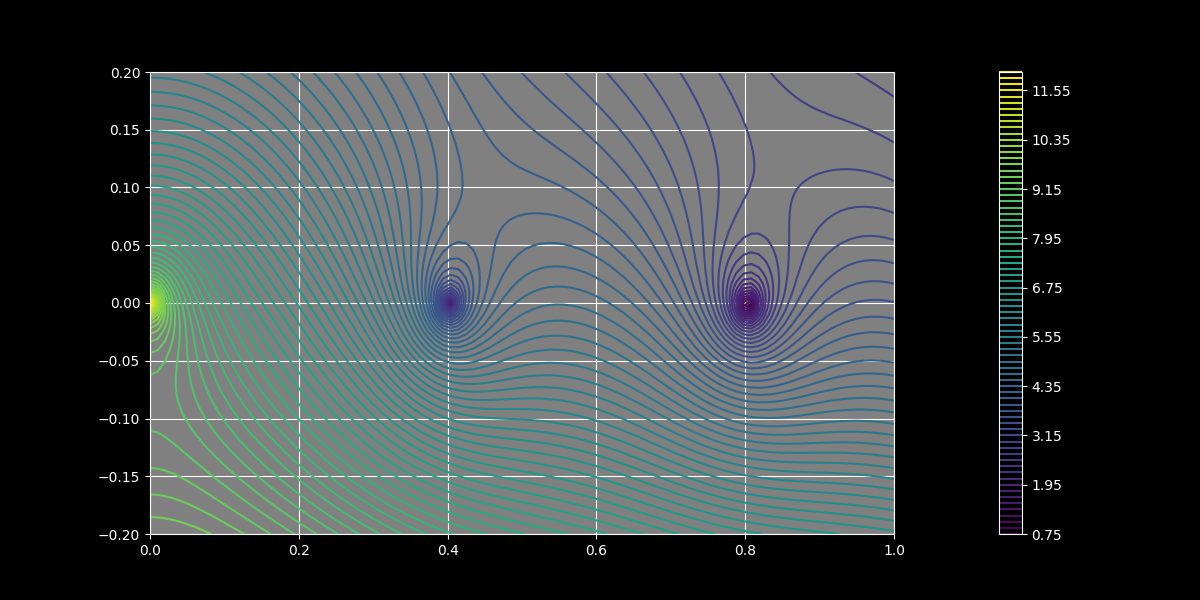

In [3]:
plotlogf(A.determinant_Z, 0, 1, -.2, .2, 'TE', 'guided', iref=100, rref=100,levels=100)

In [4]:
Z1 = newton(A.determinant_Z, .4, args=('TE', 'guided'))
plt.plot(Z1.real, Z1.imag, marker='o')
Z1

(0.4022516122992234-0.0005303227348970611j)

In [5]:
Z2 = newton(A.determinant_Z, .8, args=('TE', 'guided'))
plt.plot(Z2.real, Z2.imag, marker='o')
Z2

(0.8037223786676571-0.001998164062841405j)

In [6]:
F1 = A.fields_Z(Z1, mode_type='guided', rounding=10)
F2 = A.fields_Z(Z2, mode_type='guided', rounding=10)

In [7]:
xs = A.all_Xs
zs = np.linspace(0,20,200)

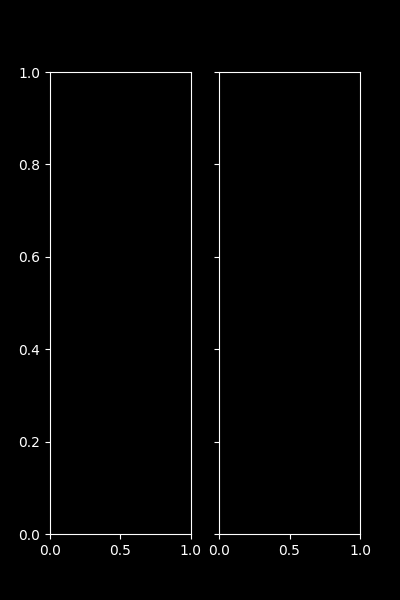

In [8]:
plt.close('all')
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(4,6))

In [9]:
A.add_2d_plot(F1, ax=ax1, xs=xs, zs=zs, plot_Rhos=True);
# ax1.set_aspect('equal')

In [10]:
A.add_2d_plot(F2, ax=ax2, xs=xs, zs=zs);
# ax2.set_aspect('equal')